# Animal intake data from LMAS notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('data/animal_intake_data_2025.12.03.csv')

df.head()

,kennel,animalid,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,sourcezipcode,ObjectId
0,INTAKE,A430999,40204,OWNER SUR,EUTH REQ,2021-01-07 00:00:00,EUTH MED,EUTH,REQUESTED,2021-01-07 00:00:00,DOG,N,N,LARGE,WHITE / TAN,BASSET HOUND,40204,1
1,FOSTER,A423884,40211,STRAY,OTC,2025-03-07 00:00:00,STRAY,FOSTER,STRAY,2025-03-12 00:00:00,DOG,N,Y,SMALL,BLACK / TAN,MIN PINSCHER / MIN PINSCHER,40213,2
2,FOSTER,A423884,40213,FOSTER,RETURN,2025-04-13 00:00:00,FOSTER RET,ADOPTION,FOSTER,2025-04-13 00:00:00,DOG,N,Y,SMALL,BLACK / TAN,MIN PINSCHER / MIN PINSCHER,40213,3
3,N47,A583388,40228,OWNER SUR,OTC,2025-05-05 00:00:00,OWNER MED,ADOPTION,WALK IN,2025-05-20 00:00:00,CAT,N,N,X-LRG,ORANGE,DOMESTIC SH,40228,4
4,FREEZER,A558504,40215,STRAY,FIELD,2022-02-21 00:00:00,DOA,DISPOSAL,NECROPSY,2022-03-09 00:00:00,DOG,N,N,MED,BLUE,AMERICAN STAFF / MIX,40218,5


### Basic EDA and cleanup

In [3]:
df.columns

Index(['kennel', 'animalid', 'jurisdiction', 'intype', 'insubtype', 'indate',
       'surreason', 'outtype', 'outsubtype', 'outdate', 'animaltype', 'sex',
       'bites', 'petsize', 'color', 'breed', 'sourcezipcode', 'ObjectId'],
      dtype='object')

ObjectId seems to just be a indexing column and is unneeded.

In [4]:
df = df.drop('ObjectId', axis=1)


In [5]:
df.dtypes

kennel           object
animalid         object
jurisdiction     object
intype           object
insubtype        object
indate           object
surreason        object
outtype          object
outsubtype       object
outdate          object
animaltype       object
sex              object
bites            object
petsize          object
color            object
breed            object
sourcezipcode    object
dtype: object

Kennel = string


AnimalID = hex number


Jurisdiction = zip code (string)


intype = string


insubtype = string


indate = date


surreason = string


outtype = string


outsubtype = string


outdate = date


animaltype = string


sex = string


bites = boolean


petsize = string


color = string


breed = string


sourcezipcode = string

In [6]:
df['indate'] = pd.to_datetime(df["indate"])
df['outdate'] = pd.to_datetime(df['outdate'])

In [7]:
df.dtypes

kennel                   object
animalid                 object
jurisdiction             object
intype                   object
insubtype                object
indate           datetime64[ns]
surreason                object
outtype                  object
outsubtype               object
outdate          datetime64[ns]
animaltype               object
sex                      object
bites                    object
petsize                  object
color                    object
breed                    object
sourcezipcode            object
dtype: object

In [8]:
duplicate_counts = df.apply(lambda x: x.duplicated(keep=False).sum())
print(duplicate_counts)

kennel           64658
animalid         23432
jurisdiction     64668
intype           64668
insubtype        64668
indate           64668
surreason        64666
outtype          64668
outsubtype       64659
outdate          64661
animaltype       64668
sex              64668
bites            64668
petsize          64668
color            64550
breed            64262
sourcezipcode    64421
dtype: int64


In [9]:
df[df.duplicated(['animalid'], keep=False)]


,kennel,animalid,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,sourcezipcode
1,FOSTER,A423884,40211,STRAY,OTC,2025-03-07,STRAY,FOSTER,STRAY,2025-03-12,DOG,N,Y,SMALL,BLACK / TAN,MIN PINSCHER / MIN PINSCHER,40213
2,FOSTER,A423884,40213,FOSTER,RETURN,2025-04-13,FOSTER RET,ADOPTION,FOSTER,2025-04-13,DOG,N,Y,SMALL,BLACK / TAN,MIN PINSCHER / MIN PINSCHER,40213
10,N16,A688292,40218,STRAY,FIELD,2021-01-19,STRAY,FOSTER,NaN,2021-03-21,DOG,S,N,MED,BROWN / WHITE,PIT BULL,40218
20,308,A688944,40214,STRAY,OTC,2021-02-05,STRAY,RTO,IN KENNEL,2021-02-09,DOG,S,N,LARGE,TAN / WHITE,GERM SHEPHERD / LABRADOR RETR,40214
21,N34,A689013,40212,STRAY,FIELD,2021-05-28,ABANDON,ADOPTION,INTERNET,2021-06-22,DOG,S,N,MED,GRAY,PIT BULL,40218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64651,FOSTER,A782748,40218,STRAY,OTC,2025-06-17,STRAY,FOSTER,STRAY,2025-06-22,DOG,S,N,SMALL,BRN MERLE,DACHSHUND,40291
64652,FOSTER,A782748,40218,FOSTER,RETURN,2025-08-01,STRAY,FOSTER,VACATION,2025-08-01,DOG,S,N,SMALL,BRN MERLE,DACHSHUND,40222
64653,FOSTER,A782748,40218,FOSTER,RETURN,2025-08-07,STRAY,TRANSFER,RESCUE GRP,2025-08-09,DOG,S,N,SMALL,BRN MERLE,DACHSHUND,40258
64655,N06,A768118,40299,FOSTER,RETURN,2024-11-09,FOSTER RET,ADOPTION,FACEBOOK,2024-11-09,DOG,S,N,MED,BR BRINDLE,PIT BULL,40211


The animal ID appears to be able to be duplicated when an animal is returned or found, so I don't want to discard the duplicates in this circumstance. This opens up a potential question: how many animals are returned or found repeatedly?

For the other columns, it makes sense that values are duplicated.

In [10]:
df.isnull().sum()

kennel               0
animalid             0
jurisdiction     13450
intype               0
insubtype          182
indate               0
surreason        13450
outtype          13790
outsubtype       23311
outdate          13755
animaltype           0
sex               1039
bites            13434
petsize           2453
color                1
breed               77
sourcezipcode     9591
dtype: int64

I don't want to get rid of any rows since animal id is not na for any rows.

Jurisdiction: unknown

insubtype: none

surreason: unknown

outtype: unknown

outsubtype: none

outdate: pd.NaT

sex: unknown

bites: unknown

petsize: unknown

color: unknown

breed: unknown

sourcezipcode: unknown

In [11]:
df['jurisdiction'].fillna("unknown")
df['insubtype'].fillna('none')
df['surreason'].fillna('unknown')
df['outtype'].fillna('unknown')
df['outsubtype'].fillna('none')
df['outdate'].fillna(pd.NaT)
df['sex'].fillna('unknown')
df['bites'].fillna('unknown')
df['petsize'].fillna('unknown')
df['color'].fillna('unknown')
df['breed'].fillna('unknown')
df['sourcezipcode'].fillna('unknown')

0          40204
1          40213
2          40213
3          40228
4          40218
          ...   
64663    unknown
64664      40219
64665      40229
64666      40214
64667      40205
Name: sourcezipcode, Length: 64668, dtype: object

In [12]:
df.rename(columns={
    'animalid': 'animal_id',
    'intype': 'intake_type',
    'insubtype': 'intake_subtype',
    'indate': "intake_date",
    'surreason': 'surrender_reason',
    'outtype': 'out_type',
    'outsubtype': 'out_subtype',
    'outdate': 'out_date',
    'animaltype': "animal_type",
    'petsize': 'size',
    'sourcezipcode': "source_zip_code"
}, inplace=True)

In [13]:
df = df[[
    'animal_id', 
    'source_zip_code',
    'jurisdiction', 
    'intake_date', 
    'intake_type', 
    'intake_subtype', 
    'surrender_reason',
    'out_date',
    'out_type',
    'out_subtype',
    'animal_type',
    'sex',
    'size',
    'breed',
    'color',
    'bites'
]]

df.head()

,animal_id,source_zip_code,jurisdiction,intake_date,intake_type,intake_subtype,surrender_reason,out_date,out_type,out_subtype,animal_type,sex,size,breed,color,bites
0,A430999,40204,40204,2021-01-07,OWNER SUR,EUTH REQ,EUTH MED,2021-01-07,EUTH,REQUESTED,DOG,N,LARGE,BASSET HOUND,WHITE / TAN,N
1,A423884,40213,40211,2025-03-07,STRAY,OTC,STRAY,2025-03-12,FOSTER,STRAY,DOG,N,SMALL,MIN PINSCHER / MIN PINSCHER,BLACK / TAN,Y
2,A423884,40213,40213,2025-04-13,FOSTER,RETURN,FOSTER RET,2025-04-13,ADOPTION,FOSTER,DOG,N,SMALL,MIN PINSCHER / MIN PINSCHER,BLACK / TAN,Y
3,A583388,40228,40228,2025-05-05,OWNER SUR,OTC,OWNER MED,2025-05-20,ADOPTION,WALK IN,CAT,N,X-LRG,DOMESTIC SH,ORANGE,N
4,A558504,40218,40215,2022-02-21,STRAY,FIELD,DOA,2022-03-09,DISPOSAL,NECROPSY,DOG,N,MED,AMERICAN STAFF / MIX,BLUE,N


Grouping by and aggregating data:

1. Animal type, and then breed

In [16]:
animal_type_count = df['animal_type'].value_counts()
animal_type_count

animal_type
DOG           33652
CAT           30051
RABBIT          358
OTHER           335
BIRD            182
LIVESTOCK        62
GUINEA PIG       28
Name: count, dtype: int64

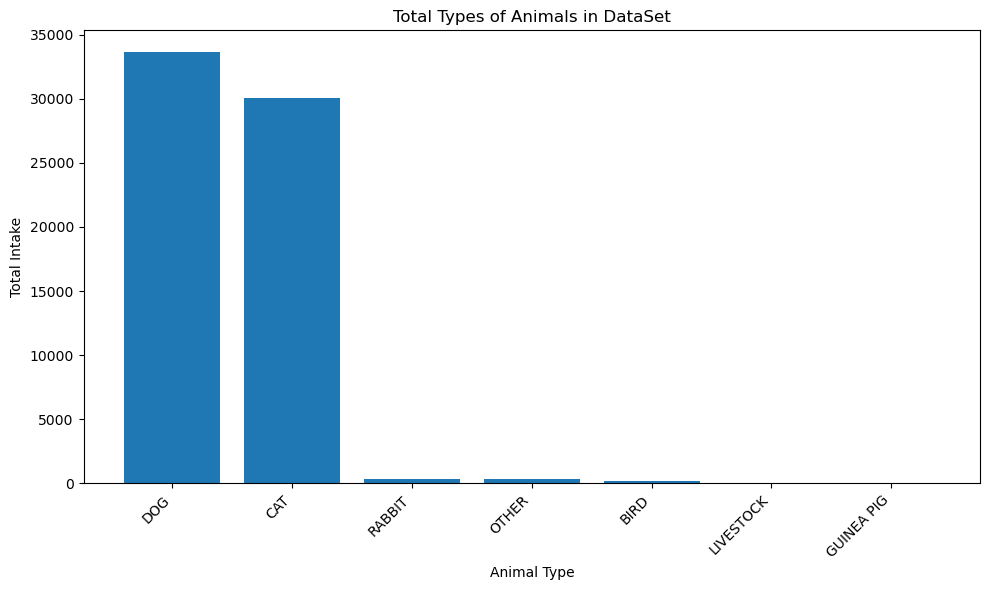

In [19]:
plt.figure(figsize=(10, 6))

color = "#2702AD"

plt.bar(animal_type_count.index, animal_type_count.values)

plt.xlabel('Animal Type')
plt.ylabel("Total Intake")
plt.title("Total Types of Animals in DataSet")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [21]:
breed_groups = df.groupby(['animal_type', 'breed']).size()
breed_groups

animal_type  breed              
BIRD         ARAUCANA / AMERICAN     1
             BANTAM                  2
             BUDGERIGAR              2
             CHICKEN                79
             COCKATIEL               3
                                    ..
RABBIT       REX                    37
             REX-MINI                3
             SATIN                   4
             TAN                     2
             THRIANTA                2
Length: 1348, dtype: int64

Dogs:

In [31]:
target_animal = 'dog'
df['animal_type'] = df['animal_type'].str.strip().str.lower()

dog_filtered_df = df[df['animal_type'] == target_animal]

dog_breed_counts = dog_filtered_df['breed'].value_counts()
dog_breed_counts



breed
PIT BULL                          5603
GERM SHEPHERD                     1714
PIT BULL / MIX                    1526
LABRADOR RETR                     1351
LABRADOR RETR / MIX               1087
                                  ... 
WEIMARANER / LABRADOR RETR           1
CHIHUAHUA SH / WELSH CORGI CAR       1
BLACK MOUTH CUR / TOSA               1
ENG SHEPHERD / AUST CATTLE DOG       1
CHINESE SHARPEI / BEAGLE             1
Name: count, Length: 1180, dtype: int64

In [32]:
dog_breed_counts_25 = dog_breed_counts.head(25)

There are 1180 breeds of dog, so I'm going to take the top 25 breeds and graph them.

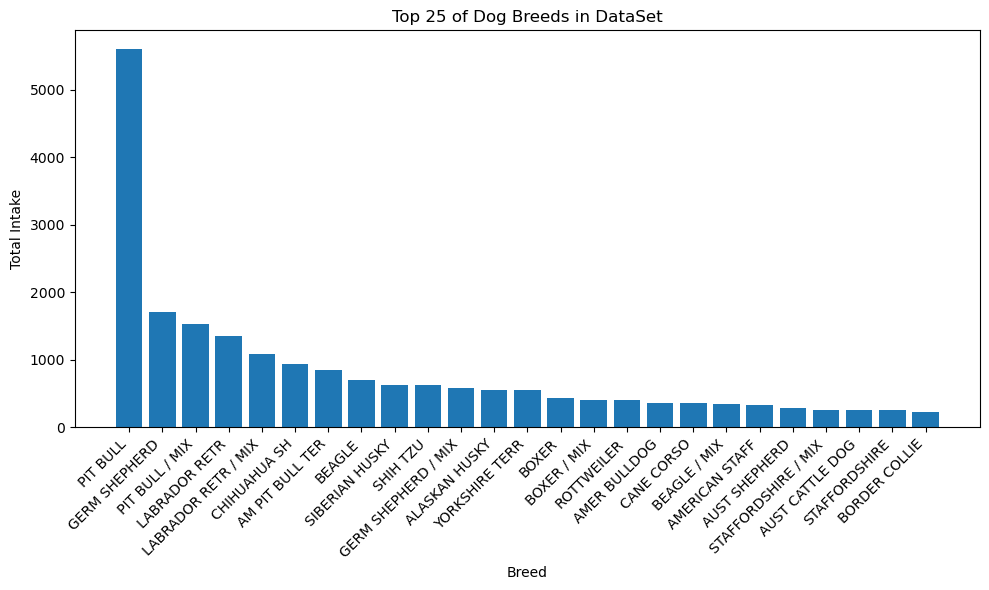

In [33]:
plt.figure(figsize=(10, 6))

color = "#2702AD"

plt.bar(dog_breed_counts_25.index, dog_breed_counts_25.values)

plt.xlabel('Breed')
plt.ylabel("Total Intake")
plt.title("Top 25 of Dog Breeds in DataSet")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Cats:

In [34]:
target_animal_cat = 'cat'
df['animal_type'] = df['animal_type'].str.strip().str.lower()

cat_filtered_df = df[df['animal_type'] == target_animal_cat]

cat_breed_counts = cat_filtered_df['breed'].value_counts()
cat_breed_counts


breed
DOMESTIC SH                   23940
DOMESTIC MH                    2273
DOMESTIC LH                    1232
AMER SH                        1168
SIAMESE                         270
                              ...  
HIMALAYAN / DOMESTIC LH           1
DOMESTIC LH / SIAMESE             1
RUSSIAN BLUE / DOMESTIC SH        1
EXOTIC SH                         1
ORIENTAL SH / MIX                 1
Name: count, Length: 90, dtype: int64

Similar to dogs, I'm going to take the top 25:

In [35]:
cat_breed_counts_25 = cat_breed_counts.head(25)

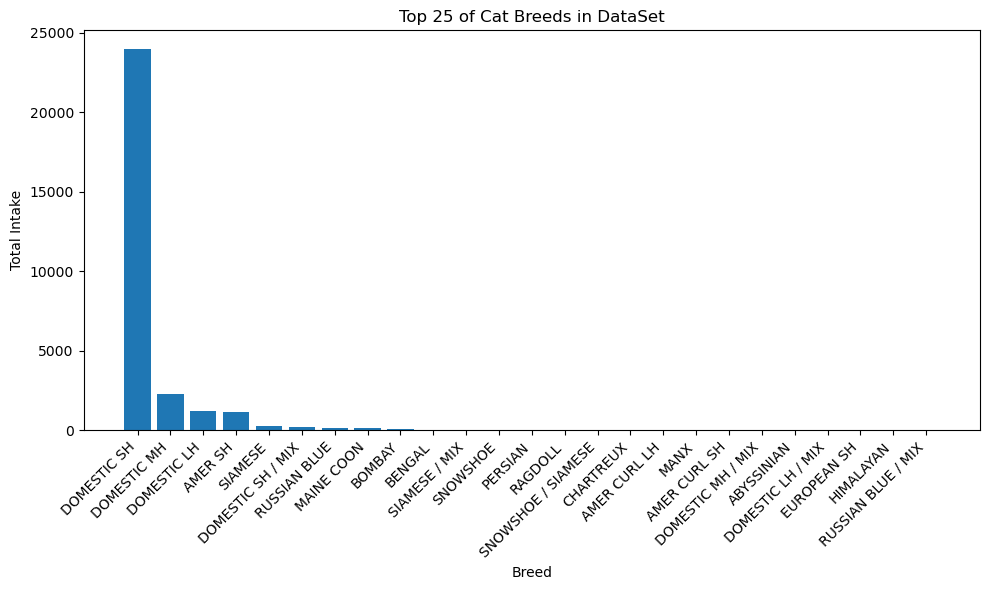

In [36]:
plt.figure(figsize=(10, 6))

color = "#2702AD"

plt.bar(cat_breed_counts_25.index, cat_breed_counts_25.values)

plt.xlabel('Breed')
plt.ylabel("Total Intake")
plt.title("Top 25 of Cat Breeds in DataSet")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

I don't think the cat one is useful- domestic shorthair can mean a lot, so maybe by color would make more sense.

In [37]:
target_animal_cat = 'cat'
df['animal_type'] = df['animal_type'].str.strip().str.lower()

cat_filtered_df = df[df['animal_type'] == target_animal_cat]

cat_color_counts = cat_filtered_df['color'].value_counts()
cat_color_counts


color
BLACK                   4726
UNKNOWN                 3302
BRN TABBY               3110
BLACK / WHITE           2541
GRAY TABBY              1644
                        ... 
BUFF / CRM TABBY           1
BLK TABBY / ORANGE         1
TAN / BROWN                1
TORTIE PT / GRAY           1
GRAY TABBY / APRICOT       1
Name: count, Length: 335, dtype: int64

In [38]:
cat_color_counts_25 = cat_color_counts.head(25)

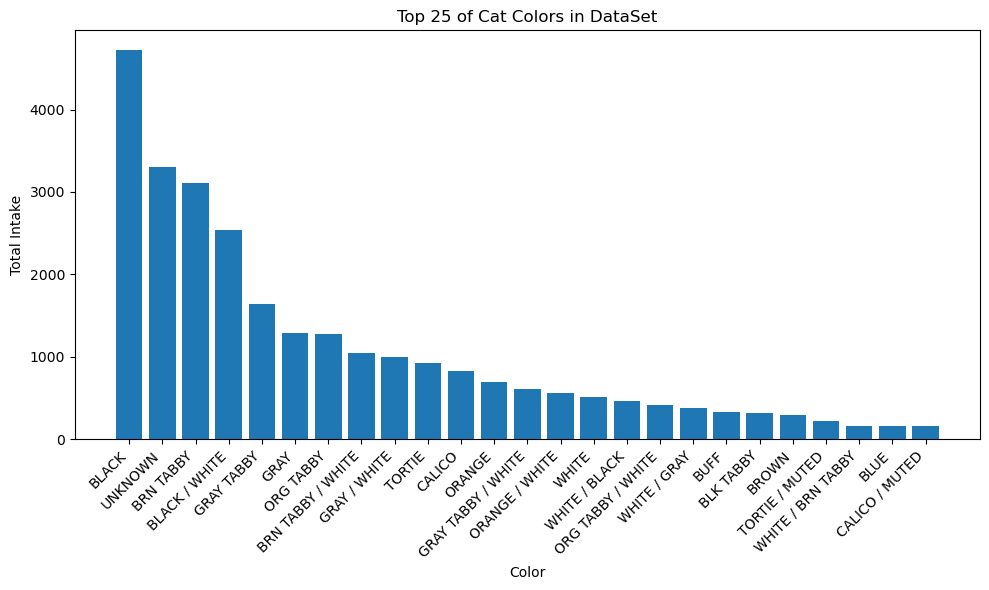

In [39]:
plt.figure(figsize=(10, 6))

color = "#2702AD"

plt.bar(cat_color_counts_25.index, cat_color_counts_25.values)

plt.xlabel('Color')
plt.ylabel("Total Intake")
plt.title("Top 25 of Cat Colors in DataSet")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()